In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.describe(include = ['O', 'bool'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,2637-FKFSY,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [7]:
df.shape

(7043, 21)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
for col in df.columns:
    print(df.groupby([col])[col].count())

customerID
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
0013-EXCHZ    1
             ..
9987-LUTYD    1
9992-RRAMN    1
9992-UJOEL    1
9993-LHIEB    1
9995-HOTOH    1
Name: customerID, Length: 7043, dtype: int64
gender
Female    3488
Male      3555
Name: gender, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
tenure
0      11
1     613
2     238
3     200
4     176
5     133
6     110
7     131
8     123
9     119
10    116
11     99
12    117
13    109
14     76
15     99
16     80
17     87
18     97
19     73
20     71
21     63
22     90
23     85
24     94
25     79
26     79
27     72
28     57
29     72
30     72
31     65
32     69
33     64
34     65
35     88
36     50
37     65
38     59
39     56
40     64
41     70
42     65
43     65
44     51
45     61
46     74
47     68
48     64
49     66
50 

In [10]:
'''
Assume "No internet service" value is the same as "No" value for the following attributes: 
MultipleLines; OnlineSecurity; OnlineBackup; DeviceProtection; TechSupport; StreamingTV; StreamingMovies
Assume "No phone service" value is the same as "No" value for "MultipleLine" attribute
'''
df.replace("No internet service", "No", inplace = True)
df.replace("No phone service", "No", inplace = True)

'''Senior Citizen column has two values, Yes and No but here it’s 1 and 0 and column is a int64 type. 
We need to replace 1s and 0s with Yes and No:change the value
'''
replacements = {
  1: 'Yes',
  0: 'No'
}
df['SeniorCitizen'].replace(replacements, inplace=True)

In [11]:
'''CustomerID, just as value, will not have any affect in customer churn so, let's first drop that column.'''
df = df.drop(['customerID'], axis =1)

In [12]:
'''TotalCharges column should be numerical'''
#df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric) 
for i in range(len(df)):
  if df.TotalCharges[i] == " ":
      print("Tenure is %s and Monthly charges are %s" % (df.tenure[i], df.MonthlyCharges[i]))

Tenure is 0 and Monthly charges are 52.55
Tenure is 0 and Monthly charges are 20.25
Tenure is 0 and Monthly charges are 80.85
Tenure is 0 and Monthly charges are 25.75
Tenure is 0 and Monthly charges are 56.05
Tenure is 0 and Monthly charges are 19.85
Tenure is 0 and Monthly charges are 25.35
Tenure is 0 and Monthly charges are 20.0
Tenure is 0 and Monthly charges are 19.7
Tenure is 0 and Monthly charges are 73.35
Tenure is 0 and Monthly charges are 61.9


So, it’s obvious that total charges are blank when tenure is 0.Let’s replace space in TotalCharges to 0 and convert the column to numeric data type

In [13]:
df.TotalCharges.replace([" "], ["0"], inplace= True)
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric) 

                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.247900      0.826178
MonthlyCharges  0.247900        1.000000      0.651174
TotalCharges    0.826178        0.651174      1.000000


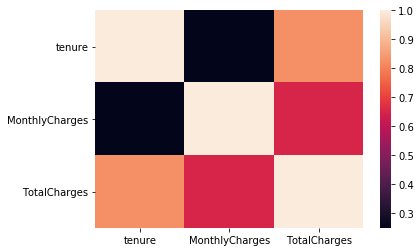

In [14]:
#Correlation Between continuous attributes
correlations = df.corr(method='pearson')
print(correlations)
sns.heatmap(correlations)

As we can see, 'TotalCharges' are correlated with both 'tenure' and 'MonthlyCharges', so I remove this attribute from the model.

In [15]:
df.drop(['TotalCharges'], axis =1, inplace = True)

C:\Users\user\Anaconda3\anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


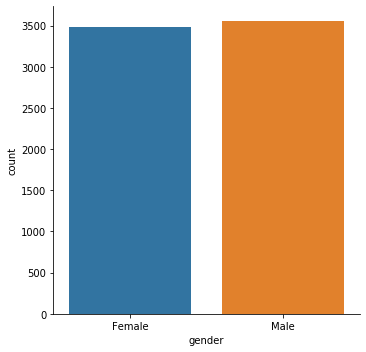

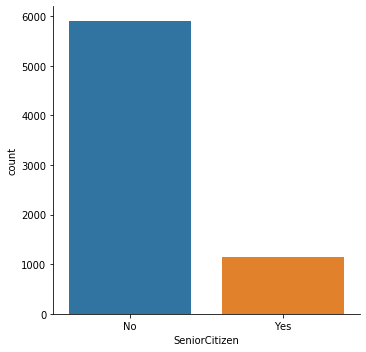

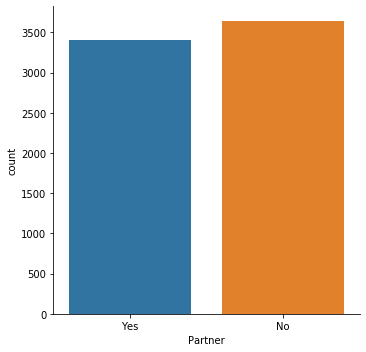

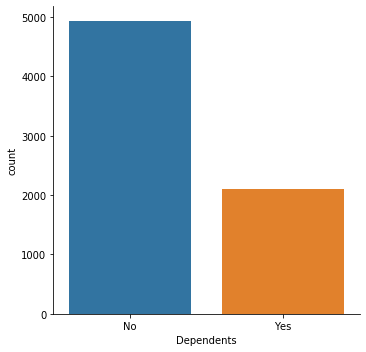

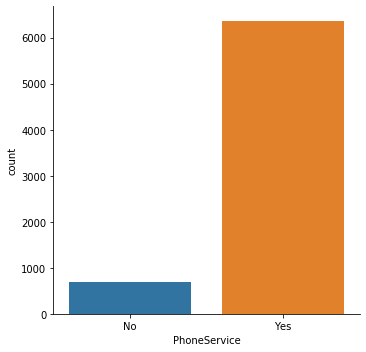

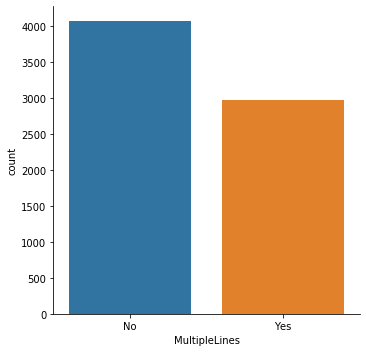

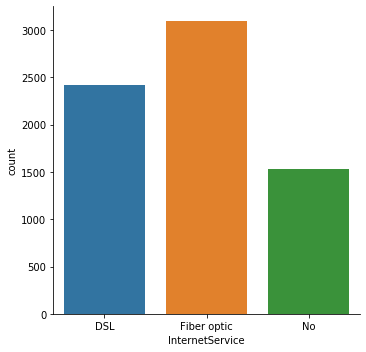

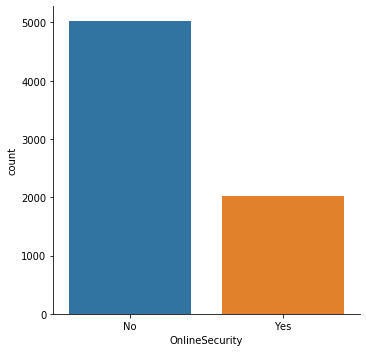

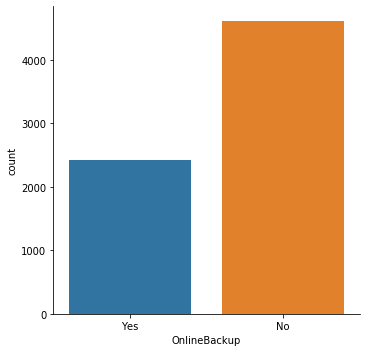

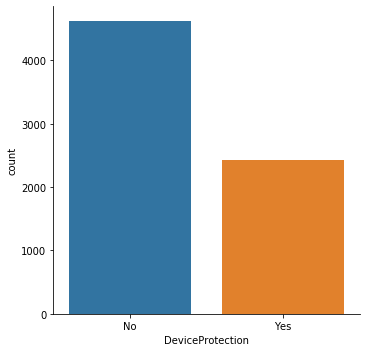

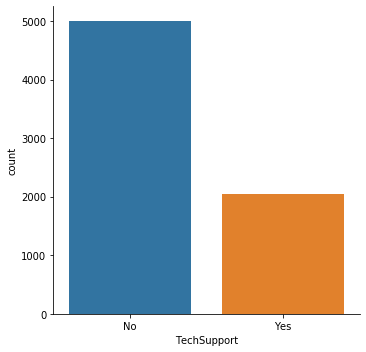

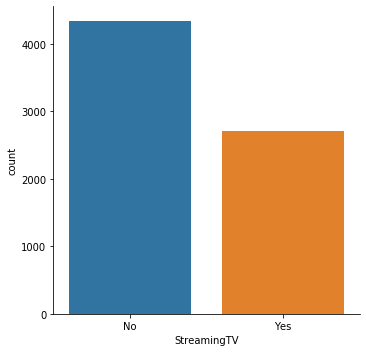

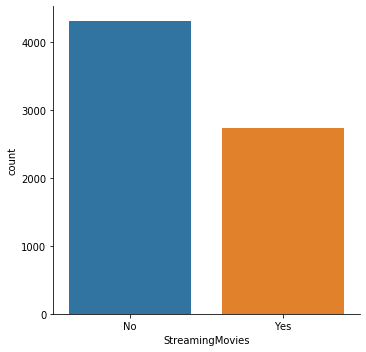

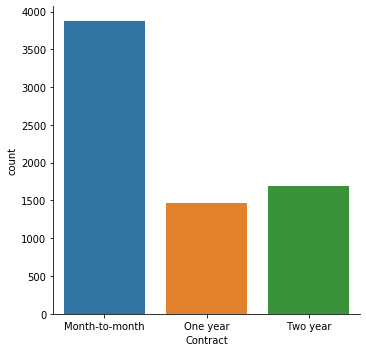

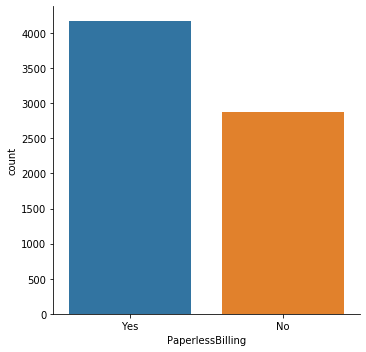

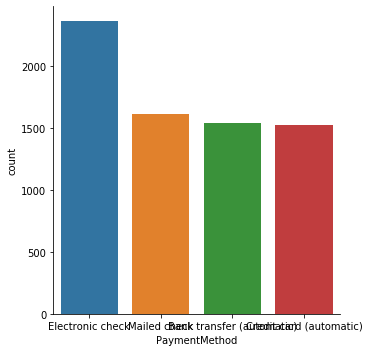

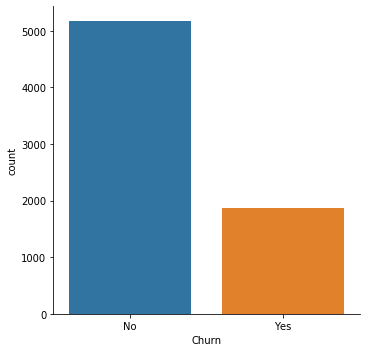

In [16]:
### Bar plots of categorical value
cat_col = df.select_dtypes(exclude=[np.number]).columns.tolist()
for feature in cat_col:
   sns.factorplot(feature,data=df,kind='count')

The categorical variables seem to have broad distribution, so we keep them for analysis

In [17]:
'''Now creating dummy variables'''
for i in df.columns:
    if i in cat_col:
        df[i] = df[i].astype('category').cat.codes
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [19]:
'''Feature Scaling'''
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df),
index=df.index, columns=df.columns)

In [20]:
class_counts = df.groupby('Churn').size()
print(class_counts)


Churn
0.0    5174
1.0    1869
dtype: int64


In [21]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn'], dtype='object')

Outcome of this dataset is a majority of 'Churn ==0 (no)' class. Therefore, F1 score is more useful than accuracy score 
as a metric for model evaluation. 

In [22]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,auc,roc_auc_score

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X = df.drop('Churn', axis = 1)
y = df['Churn']
trainx, validx, trainy, validy = train_test_split(X, y, test_size=0.4, random_state=1)

#### Support Vector Machine

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import metrics
svm = LinearSVC()
# Train the supervised model on the training set using .fit(X_train, y_train)
svm.fit(trainx, trainy)
y_pred1 = svm.predict(validx) #predicted class
print(metrics.classification_report(validy, y_pred1))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      2098
         1.0       0.63      0.53      0.58       720

    accuracy                           0.80      2818
   macro avg       0.74      0.71      0.72      2818
weighted avg       0.79      0.80      0.79      2818



#### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
# Train the supervised model on the training set using .fit(X_train, y_train)
rf = rf.fit(trainx, trainy)
y_pred2 = rf.predict(validx)
print(metrics.classification_report(validy, y_pred2))


              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      2098
         1.0       0.62      0.51      0.56       720

    accuracy                           0.79      2818
   macro avg       0.73      0.70      0.71      2818
weighted avg       0.78      0.79      0.79      2818



In [26]:
# Extract the feature importances using .feature_importances_ 
importances = rf.feature_importances_
print(trainx.columns)
print(importances)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges'], dtype='object')
[0.0330447  0.02494297 0.02766327 0.02251607 0.22839996 0.00891272
 0.02399125 0.03697055 0.02789411 0.0254236  0.02497723 0.02734071
 0.02092435 0.02104561 0.10537337 0.03051446 0.06598861 0.24407645]


Feature ranking:
1. feature 17 (0.244076)
2. feature 4 (0.228400)
3. feature 14 (0.105373)
4. feature 16 (0.065989)
5. feature 7 (0.036971)
6. feature 0 (0.033045)
7. feature 15 (0.030514)
8. feature 8 (0.027894)
9. feature 2 (0.027663)
10. feature 11 (0.027341)
11. feature 9 (0.025424)
12. feature 10 (0.024977)
13. feature 1 (0.024943)
14. feature 6 (0.023991)
15. feature 3 (0.022516)
16. feature 13 (0.021046)
17. feature 12 (0.020924)
18. feature 5 (0.008913)


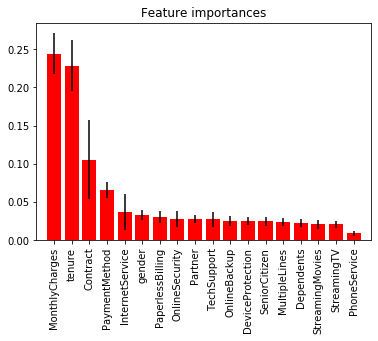

In [27]:
# Print the feature ranking
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(trainx.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(trainx.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(trainx.shape[1]), trainx.columns[indices], rotation=90)
plt.xlim([-1, trainx.shape[1]])
plt.show()

From the graph, we learn that the 'MonthlyCharges', 'tenure','Contract', and 'Payment Method' are the key features that has the most importance on the whether or not customers will leave.

#### Logistic Regression

In [28]:
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
logreg.fit(trainx, trainy)
print(logreg.coef_)
y_pred3 = logreg.predict(validx)
logreg.score(validx, validy) 
print(metrics.classification_report(validy, y_pred3))

[[-0.02480861  0.29801813  0.0263456  -0.15179267 -2.43747097 -0.98472073
   0.12494938  0.11416616 -0.53452019 -0.20413376 -0.23300307 -0.52053085
   0.02351809 -0.03559089 -1.3663611   0.38408799  0.15921445  3.29139264]]
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      2098
         1.0       0.63      0.53      0.58       720

    accuracy                           0.80      2818
   macro avg       0.74      0.71      0.72      2818
weighted avg       0.79      0.80      0.79      2818



C:\Users\user\Anaconda3\anaconda\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\user\Anaconda3\anaconda\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


Text(0, 0.5, 'Churn')

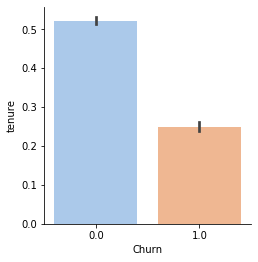

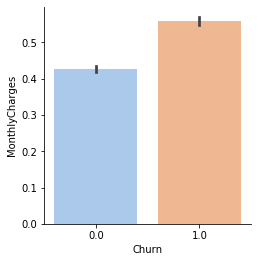

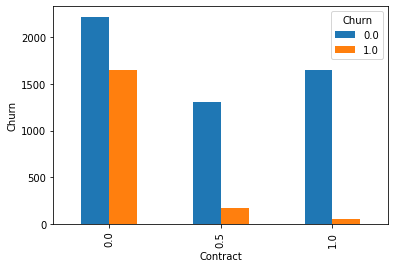

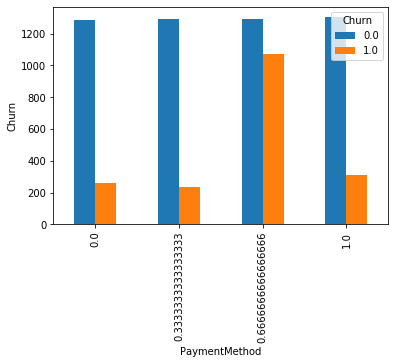

In [29]:
g = sns.PairGrid(df,
                 y_vars= ['tenure'],
                 x_vars=['Churn'],
                 aspect=1, size=3.5)
g.map(sns.barplot, palette="pastel");

g = sns.PairGrid(df,
                 y_vars= ['MonthlyCharges'],
                 x_vars=['Churn'],
                 aspect=1, size=3.5)
g.map(sns.barplot, palette="pastel");

pd.crosstab(df.Contract,df.Churn).plot(kind='bar')
plt.xlabel('Contract')
plt.ylabel('Churn')

pd.crosstab(df.PaymentMethod,df.Churn).plot(kind='bar')
plt.xlabel('PaymentMethod')
plt.ylabel('Churn')

In [30]:
import keras

Using TensorFlow backend.
C:\Users\user\Anaconda3\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\anaconda\lib\site-packages\tenso

In [31]:
from keras.models import Sequential
from keras.layers import Dense

In [32]:
classifier = Sequential()
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 18))
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

C:\Users\user\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=18, units=6, kernel_initializer="uniform")`
  
C:\Users\user\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [33]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [34]:
model = classifier.fit(trainx, trainy, batch_size = 10, nb_epoch = 100)

C:\Users\user\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.



Epoch 1/100
4225/4225 [==============================] - 1s 201us/step - loss: 0.5748 - accuracy: 0.7280
Epoch 2/100
4225/4225 [==============================] - 1s 150us/step - loss: 0.4836 - accuracy: 0.7280
Epoch 3/100
4225/4225 [==============================] - 1s 143us/step - loss: 0.4590 - accuracy: 0.7666
Epoch 4/100
4225/4225 [==============================] - 1s 143us/step - loss: 0.4520 - accuracy: 0.7858
Epoch 5/100
4225/4225 [==============================] - 1s 141us/step - loss: 0.4475 - accuracy: 0.7844
Epoch 6/100
4225/4225 [==============================] - 1s 146us/step - loss: 0.4460 - accuracy: 0.7886
Epoch 7/100
4225/4225 [==============================] - 1s 137us/step - loss: 0.4448 - accuracy: 0.7903
Epoch 8/100
4225/4225 [==============================] - 1s 139us/step - loss: 0.4428 - accuracy: 0.7901
Epoch 9/100
4225/4225 [==============================] - 1s 122us/step - loss: 0.4407 - accuracy: 0.7924
Epoch 10/100
4225/4225 [==============================

Epoch 76/100
4225/4225 [==============================] - 1s 179us/step - loss: 0.4238 - accuracy: 0.8038
Epoch 77/100
4225/4225 [==============================] - 1s 191us/step - loss: 0.4236 - accuracy: 0.8080
Epoch 78/100
4225/4225 [==============================] - 1s 169us/step - loss: 0.4233 - accuracy: 0.8052
Epoch 79/100
4225/4225 [==============================] - 1s 182us/step - loss: 0.4236 - accuracy: 0.8043
Epoch 80/100
4225/4225 [==============================] - 1s 334us/step - loss: 0.4233 - accuracy: 0.8052
Epoch 81/100
4225/4225 [==============================] - 1s 177us/step - loss: 0.4230 - accuracy: 0.8080
Epoch 82/100
4225/4225 [==============================] - 1s 281us/step - loss: 0.4234 - accuracy: 0.8047
Epoch 83/100
4225/4225 [==============================] - 1s 254us/step - loss: 0.4232 - accuracy: 0.8071
Epoch 84/100
4225/4225 [==============================] - 1s 204us/step - loss: 0.4223 - accuracy: 0.8031
Epoch 85/100
4225/4225 [======================

In [35]:
y_pred = classifier.predict(validx)
y_pred = (y_pred > 0.5)
print(confusion_matrix(validy, y_pred))
print(classification_report(validy, y_pred))
print(accuracy_score(validy, y_pred))

[[1873  225]
 [ 331  389]]
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      2098
         1.0       0.63      0.54      0.58       720

    accuracy                           0.80      2818
   macro avg       0.74      0.72      0.73      2818
weighted avg       0.79      0.80      0.80      2818

0.8026969481902059


Conclusion

When a customer leaves, how often does the classifier predict that correctly? -> “Recall” and a quick look at these diagrams can demonstrate that SVM is best for this criteria with 79%

When a classifier predicts a customer will leave, how often does that customer actually leave? -> “Precision” of Logistic Regression with 64%

F1-score of Logistic Regression with 79%

Some important things about the features:

-tenure, Contract, PaymentMethod, MonthlyCharges play a role in customer churn. -Customers use electronic check; on a month-to-month contract; within 12 months tenure, are more likely to churn. -On the other hand, customers with one or two year contract; longer than 12 months tenure are less likely to churn.